# Data Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### PLI - Purchasing Level Indeces

In [2]:
pli = pd.read_csv("pli.csv")

In [3]:
# Head function is used to have a quick look of our dataset, specifically its first 5 rows

pli.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PLI,TOT,OECDIDX,A,1997,97,NaN
1,AUS,PLI,TOT,OECDIDX,A,1998,84,NaN
2,AUS,PLI,TOT,OECDIDX,A,1999,86,NaN
3,AUS,PLI,TOT,OECDIDX,A,2000,82,NaN
4,AUS,PLI,TOT,OECDIDX,A,2001,77,NaN


In [4]:
# Shape function is used to return the dataset dimension

pli.shape

(1175, 8)

In [5]:
# Info function is used to get an understanding of the data types we are working with

pli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    1175 non-null   object 
 1   INDICATOR   1175 non-null   object 
 2   SUBJECT     1175 non-null   object 
 3   MEASURE     1175 non-null   object 
 4   FREQUENCY   1175 non-null   object 
 5   TIME        1175 non-null   int64  
 6   Value       1175 non-null   int64  
 7   Flag Codes  0 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 73.6+ KB


In [6]:
# let's loop over all columns and, for each column, we want to print all unique values available in the dataset

for i in pli.columns:
    print(i + ": ")
    print(pli[i].unique())

LOCATION: 
['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'BRA' 'CHL' 'CHN' 'EST' 'IND' 'IDN'
 'ISR' 'RUS' 'SVN' 'ZAF' 'OECD' 'EA18' 'COL' 'LTU' 'LVA' 'EU27' 'CRI']
INDICATOR: 
['PLI']
SUBJECT: 
['TOT']
MEASURE: 
['OECDIDX']
FREQUENCY: 
['A']
TIME: 
[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
Value: 
[ 97  84  86  82  77  81  91  99 104 106 115 117 111 136 149 158 143 135
 126 125 131 120 124 105 101  90  93  95 108 119 116 110 100 102 107  89
  92 103 109  87  88  94 123 121  41  45  42  40  49  52  55  60  64  68
  71  70  72  67  63  62  65  69 132 133 128 118 140 141 145 147 142 129
 134 122 114  98 127 113 112  96  78  80  85  75  76  73  74  47  51  56
  59  57  58  54 150 162 138 130 137 139 146 154  79  66  61  53 148 155
 157 152  46  50  48  83  37  36  39  38

In [7]:
# Describe function is used to generate descriptive statistics

pli.describe()

,TIME,Value,Flag Codes
count,1175.000000,1175.000000,0.0
mean,2009.000000,85.252766,NaN
std,7.214173,30.885704,NaN
min,1997.000000,11.000000,NaN
25%,2003.000000,60.000000,NaN
50%,2009.000000,88.000000,NaN
75%,2015.000000,109.000000,NaN
max,2021.000000,162.000000,NaN


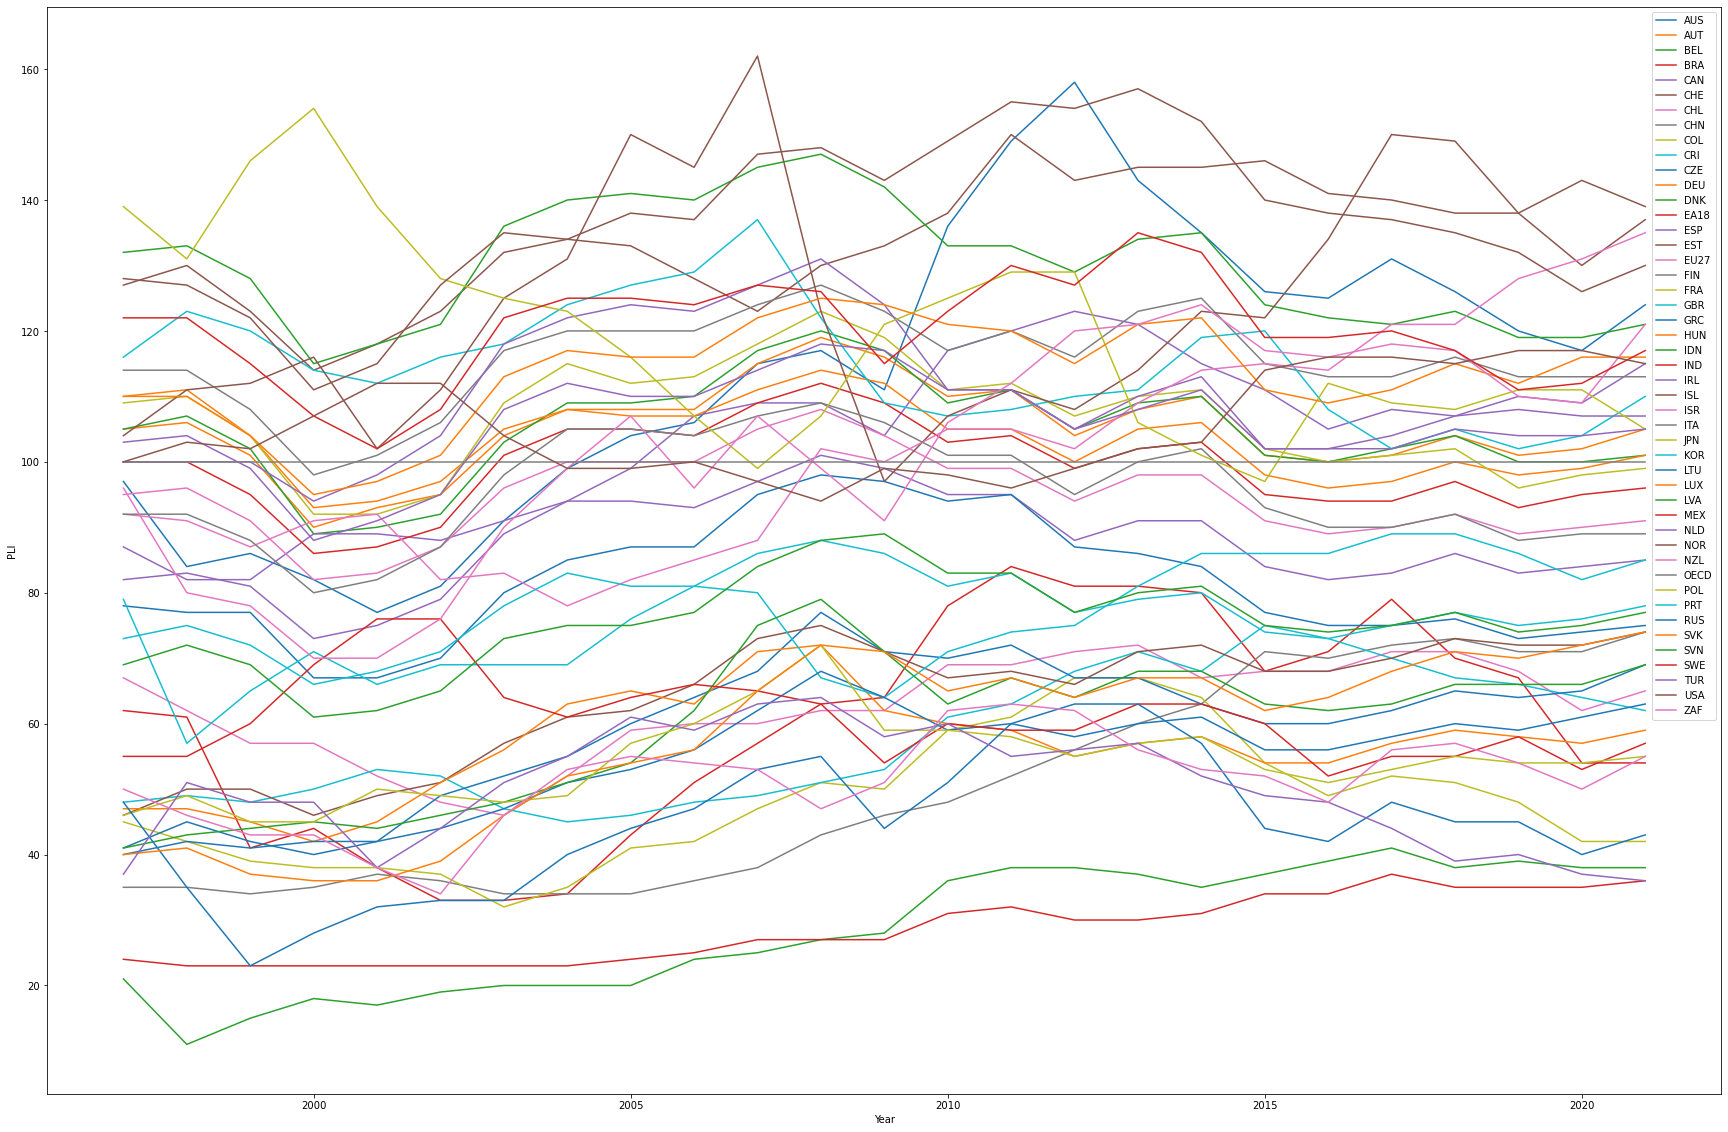

In [8]:
# let's plot how the pli evolves over time for each country

plt.figure(figsize=(30, 20))
for i in np.unique(pli["LOCATION"]):
    x = pli.loc[pli["LOCATION"]==i]["TIME"]
    y = pli.loc[pli["LOCATION"]==i]["Value"]
    plt.plot(x, y, label = i)
    
plt.xlabel("Year")
plt.ylabel("PLI")
plt.legend()
plt.show()

### PPI - Purchasing Power Parities

In [9]:
ppp = pd.read_csv("ppp.csv")

In [10]:
ppp.head()

,Unnamed: 0.1,Unnamed: 0,DATAFLOW,LAST UPDATE,freq,na_item,ppp_cat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,0,0,ESTAT:PRC_PPP_IND(1.0),24/06/22 23:00:00,A,EXP_EUR,A0101,AL,2005,1945.0,NaN
1,1,1,ESTAT:PRC_PPP_IND(1.0),24/06/22 23:00:00,A,EXP_EUR,A0101,AL,2006,2094.0,NaN
2,2,2,ESTAT:PRC_PPP_IND(1.0),24/06/22 23:00:00,A,EXP_EUR,A0101,AL,2007,2318.0,NaN
3,3,3,ESTAT:PRC_PPP_IND(1.0),24/06/22 23:00:00,A,EXP_EUR,A0101,AL,2008,2606.0,NaN
4,4,4,ESTAT:PRC_PPP_IND(1.0),24/06/22 23:00:00,A,EXP_EUR,A0101,AL,2009,2599.0,NaN


In [11]:
ppp_new = ppp.pivot_table("OBS_VALUE", ["geo","TIME_PERIOD"], "ppp_cat").reset_index()

In [12]:
ppp_new.head()

ppp_cat,geo,TIME_PERIOD,A0101,A0102,A0103,A0104,A0105,A0106,A0107,A0108,A0109,A0110,A0111,A0112
0,AL,2005,10798.578962,1067.136188,1258.383208,4233.016204,1842.115858,1922.970629,1128.810788,584.973458,715.892221,2165.232490,943.960767,1443.451704
1,AL,2006,11524.835975,1136.265175,1340.608250,4637.742171,1963.007629,2001.091329,1254.309925,603.739458,767.773242,2342.930789,965.996517,1738.847254
2,AL,2007,12813.186767,1256.999012,1627.168083,5059.319254,2635.215342,2263.231475,1667.941146,720.898625,1021.797979,2563.880980,1307.407404,2256.988063
3,AL,2008,14324.853017,1411.864467,1810.864708,5400.331463,2948.154275,2552.566662,1893.218654,879.877292,1140.930946,2956.415975,1454.281967,2577.953092
4,AL,2009,15304.002433,1445.891029,1780.601208,5488.864742,2862.185421,2880.220850,1836.851571,906.190233,1136.259129,3195.564362,1274.108667,2484.586367


In [13]:
ppp_new.columns

Index(['geo', 'TIME_PERIOD', 'A0101', 'A0102', 'A0103', 'A0104', 'A0105',
       'A0106', 'A0107', 'A0108', 'A0109', 'A0110', 'A0111', 'A0112'],
      dtype='object', name='ppp_cat')

In [14]:
ppp_new.shape

(898, 14)

In [15]:
ppp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   geo          898 non-null    object 
 1   TIME_PERIOD  898 non-null    int64  
 2   A0101        898 non-null    float64
 3   A0102        898 non-null    float64
 4   A0103        898 non-null    float64
 5   A0104        890 non-null    float64
 6   A0105        898 non-null    float64
 7   A0106        891 non-null    float64
 8   A0107        898 non-null    float64
 9   A0108        898 non-null    float64
 10  A0109        890 non-null    float64
 11  A0110        890 non-null    float64
 12  A0111        898 non-null    float64
 13  A0112        890 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 98.3+ KB


In [16]:
# Let's see how many null values we have in our dataset

ppp_new.isnull().sum()

ppp_cat
geo            0
TIME_PERIOD    0
A0101          0
A0102          0
A0103          0
A0104          8
A0105          0
A0106          7
A0107          0
A0108          0
A0109          8
A0110          8
A0111          0
A0112          8
dtype: int64

In [17]:
ppp_new.describe()

ppp_cat,TIME_PERIOD,A0101,A0102,A0103,A0104,A0105,A0106,A0107,A0108,A0109,A0110,A0111,A0112
count,898.000000,898.000000,898.000000,898.000000,890.000000,898.000000,891.000000,898.000000,898.000000,890.000000,890.000000,898.000000,890.000000
mean,2009.275056,14419.447169,4828.378723,4562.535961,22509.690920,5503.594658,13642.676543,12334.078496,2799.519145,9847.631004,8975.012482,6994.521060,15403.622121
std,7.308084,28415.500683,11514.768658,6781.450073,37053.980297,9383.733141,23014.186847,21141.075158,5318.099122,16104.152371,15066.060920,11742.628755,25541.110900
min,1995.000000,338.208456,68.497599,58.898867,384.935123,48.974213,55.000000,78.459423,46.379340,42.693864,240.644930,49.834739,95.419214
25%,2003.000000,1932.635753,861.746997,510.734587,3344.487019,651.620309,1482.740230,1565.912358,380.508765,985.663724,1503.097278,899.711473,1595.493525
50%,2010.000000,5801.883658,1793.528901,2030.330321,9841.688372,2520.716020,5957.808662,5154.618524,1083.404955,4333.823023,3862.321435,3164.767186,5771.505664
75%,2016.000000,18402.651911,5570.653798,4805.732264,27883.648900,5532.009798,15844.098976,12925.592607,3246.508933,11359.838127,10911.069628,6494.936173,17497.014898
max,2021.000000,548967.812889,235567.474333,92154.153111,668950.970667,160406.541111,399839.145111,331984.744778,88191.572556,252281.954778,262894.190778,185152.048444,416551.389778


# Data Preparation

### PLI - Purchasing Level Indeces

In [18]:
columns = ["LOCATION", "TIME", "Value"]

pli = pli[columns]

In [19]:
pli.head()

,LOCATION,TIME,Value
0,AUS,1997,97
1,AUS,1998,84
2,AUS,1999,86
3,AUS,2000,82
4,AUS,2001,77


In [20]:
pli.isnull().sum()

LOCATION    0
TIME        0
Value       0
dtype: int64

In [21]:
pli.shape

(1175, 3)

### PPI - Purchasing Power Parities

No A04, A05, E01, P010101, P010102, P010103, P0102, P02

In [22]:
columns = ['geo', 'TIME_PERIOD', 'A0101', 'A0102', 'A0103', 'A0104', 'A0105',
       'A0106', 'A0107', 'A0108', 'A0109', 'A0110', 'A0111', 'A0112']

ppp = ppp_new[columns]

In [23]:
ppp.head()

ppp_cat,geo,TIME_PERIOD,A0101,A0102,A0103,A0104,A0105,A0106,A0107,A0108,A0109,A0110,A0111,A0112
0,AL,2005,10798.578962,1067.136188,1258.383208,4233.016204,1842.115858,1922.970629,1128.810788,584.973458,715.892221,2165.232490,943.960767,1443.451704
1,AL,2006,11524.835975,1136.265175,1340.608250,4637.742171,1963.007629,2001.091329,1254.309925,603.739458,767.773242,2342.930789,965.996517,1738.847254
2,AL,2007,12813.186767,1256.999012,1627.168083,5059.319254,2635.215342,2263.231475,1667.941146,720.898625,1021.797979,2563.880980,1307.407404,2256.988063
3,AL,2008,14324.853017,1411.864467,1810.864708,5400.331463,2948.154275,2552.566662,1893.218654,879.877292,1140.930946,2956.415975,1454.281967,2577.953092
4,AL,2009,15304.002433,1445.891029,1780.601208,5488.864742,2862.185421,2880.220850,1836.851571,906.190233,1136.259129,3195.564362,1274.108667,2484.586367


In [24]:
ppp.isnull().sum()

ppp_cat
geo            0
TIME_PERIOD    0
A0101          0
A0102          0
A0103          0
A0104          8
A0105          0
A0106          7
A0107          0
A0108          0
A0109          8
A0110          8
A0111          0
A0112          8
dtype: int64

In [25]:
ppp.shape

(898, 14)

### Country mapping

In [26]:
np.unique(pli["LOCATION"])

array(['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'COL',
       'CRI', 'CZE', 'DEU', 'DNK', 'EA18', 'ESP', 'EST', 'EU27', 'FIN',
       'FRA', 'GBR', 'GRC', 'HUN', 'IDN', 'IND', 'IRL', 'ISL', 'ISR',
       'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'NLD', 'NOR',
       'NZL', 'OECD', 'POL', 'PRT', 'RUS', 'SVK', 'SVN', 'SWE', 'TUR',
       'USA', 'ZAF'], dtype=object)

In [27]:
np.unique(ppp["geo"])

array(['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE',
       'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU',
       'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE',
       'SI', 'SK', 'TR', 'UK', 'XK'], dtype=object)

In [28]:
def change_country_pli(x):
    if x == "AUS": return "Australia"
    elif x == 'AUT': return "Austria"
    elif x == 'BEL': return "Belgium"
    elif x == 'CAN': return "Canada"
    elif x == 'CZE': return "Czech Republic"
    elif x == 'DNK': return "Denmark"
    elif x == 'FIN': return "Finland"
    elif x == 'FRA': return "France"
    elif x == 'DEU': return "Germany"
    elif x == 'GRC': return "Greece"
    elif x == 'HUN': return "Hungary"
    elif x == 'ISL': return "Iceland"
    elif x == 'IRL': return "Ireland"
    elif x == 'ITA': return "Italy"
    elif x == 'JPN': return "Japan"
    elif x == 'KOR': return "Korea"
    elif x == 'LUX': return "Luxembourg"
    elif x == 'MEX': return "Mexico"
    elif x == 'NLD': return "Netherlands"
    elif x == 'NZL': return "New Zealand"
    elif x == 'NOR': return "Norway"
    elif x == 'POL': return "Poland"
    elif x == 'PRT': return "Portugal"
    elif x == 'SVK': return "Slovak Republic"
    elif x == 'ESP': return "Spain"
    elif x == 'SWE': return "Sweden"
    elif x == 'CHE': return "Switzerland"
    elif x == 'TUR': return "Türkiye"
    elif x == 'GBR': return "United Kingdom"
    elif x == 'USA': return "United States"
    elif x == 'BRA': return "Brazil"
    elif x == 'CHL': return "Chile"
    elif x == 'CHN': return "China"
    elif x == 'EST': return "Estonia"
    elif x == 'IND': return "India"
    elif x == 'IDN': return "Indonesia"
    elif x == 'ISR': return "Israel"
    elif x == 'RUS': return "Russia"
    elif x == 'SVN': return "Slovenia"
    elif x == 'ZAF': return "South Africa"
    elif x == 'COL': return "Colombia"
    elif x == 'LTU': return "Lithuania"
    elif x == 'LVA': return "Latvia"
    elif x == 'CRI': return "Costa Rica"

In [29]:
pli["LOCATION"]= pli["LOCATION"].apply(change_country_pli)

In [30]:
def change_country_ppp(x):
    if x == "AL": return "Albania"
    elif x == 'AT': return "Austria"
    elif x == 'BA': return "Bosnia and Herzegovina"
    elif x == 'BE': return "Belgium"
    elif x == 'BG': return "Bulgaria"
    elif x == 'CH': return "Switzerland"
    elif x == 'CY': return "Cyprus"
    elif x == 'CZ': return "Czechia"
    elif x == 'DE': return "Germany"
    elif x == 'DK': return "Denmark"
    elif x == 'EE': return "Estonia"
    elif x == 'EL': return "Greece"
    elif x == 'ES': return "Spain"
    elif x == 'FI': return "Finland"
    elif x == 'FR': return "France"
    elif x == 'HR': return "Croatia"
    elif x == 'HU': return "Hungary"
    elif x == 'IE': return "Ireland"
    elif x == 'IS': return "Iceland"
    elif x == 'IT': return "Italy"
    elif x == 'LT': return "Lithuania"
    elif x == 'LU': return "Luxembourg"
    elif x == 'LV': return "Latvia"
    elif x == 'ME': return "Montenegro"
    elif x == 'MK': return "North Macedonia"
    elif x == 'MT': return "Malta"
    elif x == 'NL': return "Netherlands"
    elif x == 'NO': return "Norway"
    elif x == 'PL': return "Poland"
    elif x == 'PT': return "Portugal"
    elif x == 'RO': return "Romania"
    elif x == 'RS': return "Serbia"
    elif x == 'SE': return "Sweden"
    elif x == 'SI': return "Slovenia"
    elif x == 'SK': return "Slovakia"
    elif x == 'TR': return "Türkiye"
    elif x == 'UK': return "United Kingdom"
    elif x == 'XK': return "Kosovo"

In [31]:
ppp["geo"]= ppp["geo"].apply(change_country_ppp)

In [32]:
pli = pli.dropna()

In [33]:
pli.head()

,LOCATION,TIME,Value
0,Australia,1997,97
1,Australia,1998,84
2,Australia,1999,86
3,Australia,2000,82
4,Australia,2001,77


In [34]:
ppp.head()

ppp_cat,geo,TIME_PERIOD,A0101,A0102,A0103,A0104,A0105,A0106,A0107,A0108,A0109,A0110,A0111,A0112
0,Albania,2005,10798.578962,1067.136188,1258.383208,4233.016204,1842.115858,1922.970629,1128.810788,584.973458,715.892221,2165.232490,943.960767,1443.451704
1,Albania,2006,11524.835975,1136.265175,1340.608250,4637.742171,1963.007629,2001.091329,1254.309925,603.739458,767.773242,2342.930789,965.996517,1738.847254
2,Albania,2007,12813.186767,1256.999012,1627.168083,5059.319254,2635.215342,2263.231475,1667.941146,720.898625,1021.797979,2563.880980,1307.407404,2256.988063
3,Albania,2008,14324.853017,1411.864467,1810.864708,5400.331463,2948.154275,2552.566662,1893.218654,879.877292,1140.930946,2956.415975,1454.281967,2577.953092
4,Albania,2009,15304.002433,1445.891029,1780.601208,5488.864742,2862.185421,2880.220850,1836.851571,906.190233,1136.259129,3195.564362,1274.108667,2484.586367


In [35]:
ppp.rename(columns = {"geo":"LOCATION", "TIME_PERIOD":"TIME"}, inplace = True)

### Dataset creation

In [36]:
df = pd.merge(ppp, pli, how="outer", on=["LOCATION", "TIME"])

In [37]:
df = df.dropna()

In [38]:
df.shape

(610, 15)

In [39]:
df

,LOCATION,TIME,A0101,A0102,A0103,A0104,A0105,A0106,A0107,A0108,A0109,A0110,A0111,A0112,Value
19,Austria,1997,4108.906094,1371.341750,2728.457071,8056.509275,2796.687374,5112.427472,4742.453818,758.874407,4209.634418,3456.316018,4050.692980,5139.136800,105.0
20,Austria,1998,4134.874040,1453.494591,2756.667422,8293.207795,2806.232078,5477.970662,4853.885138,817.797209,4434.233937,3589.570129,4386.441689,5418.631930,106.0
21,Austria,1999,3512.134262,1309.272732,2345.518001,7587.366398,2488.730213,4901.367888,4352.972547,767.458724,3957.853337,2987.631369,3940.088034,4711.042975,101.0
22,Austria,2000,3668.050761,1348.232551,2392.914897,7949.323076,2632.448811,5102.293726,4649.665077,1081.369088,4194.190239,3102.788189,4180.520262,5065.905120,90.0
23,Austria,2001,3818.863899,1371.184839,2440.900536,8222.266815,2596.414954,5276.760465,4635.502159,1081.188711,4309.585478,3198.814951,4141.896514,5107.650291,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,United Kingdom,2016,29259.360511,8988.103848,20755.357104,72547.859787,15963.831943,42094.130340,44656.792881,6050.833322,51234.168334,27565.765868,27466.682838,54944.545139,108.0
886,United Kingdom,2017,30059.019361,9054.270321,19814.246746,71906.006573,16819.686727,42091.535982,44759.855028,6164.212231,52167.821586,27957.024078,28822.627775,54899.011230,102.0
887,United Kingdom,2018,31289.224312,9810.175341,20180.572942,73980.042369,18241.628114,42661.360255,47910.410261,7800.343273,51789.522434,28449.634709,29536.368308,59370.521340,105.0
888,United Kingdom,2019,32643.486245,9910.210439,20979.579868,75692.927210,19631.749176,45819.864644,49554.619258,7596.143850,54250.182363,30575.683825,29913.511096,60488.994942,102.0


In [35]:
df.loc[df["LOCATION"]=="Italy"]

,LOCATION,TIME,A0101,A0102,A0103,A0104,A0105,A0106,A0107,A0108,...,A0502,A0503,E01,GDP,P010101,P010102,P010103,P0102,P02,Value
467,Italy,1997,36066.954932,9774.970971,17309.014719,46770.441286,17409.519625,25991.939751,31183.792802,5292.603106,...,40655.169726,49.084346,292747.434324,292607.162450,80505.050673,24439.714089,23486.238499,78684.338669,169313.465404,92.0
468,Italy,1998,36926.643923,10222.660800,18483.839152,48760.831172,18607.169205,27422.192089,32979.756638,5958.971847,...,41375.603768,47.976703,307236.533418,305674.982581,82976.806985,26130.970549,25140.625146,82602.573566,177850.908250,92.0
469,Italy,1999,31611.490350,9246.201570,16408.001688,46022.417212,17026.689272,23520.737734,29964.866410,5803.244092,...,38700.214128,47.242934,275132.740370,315586.874281,73014.599317,24030.518995,22603.731458,77452.696641,159472.259348,88.0
470,Italy,2000,33100.867658,10183.388676,17011.131507,46803.252692,17651.450522,25780.850854,31888.430497,5960.623431,...,42690.798981,45.147087,292094.732935,333973.632260,75734.352616,24719.606301,24216.273968,85632.967361,172069.779096,80.0
471,Italy,2001,33880.646355,10538.574797,17245.842999,48082.762797,17040.799090,27872.341351,31660.469002,6259.328973,...,45570.576721,163.212516,301038.429436,345562.593968,77646.532529,24733.276047,23364.269064,89181.126097,179445.296874,82.0
472,Italy,2002,33656.079247,10638.696105,16969.509668,49895.536813,17350.663492,28769.847716,32252.168918,6661.867278,...,49005.737196,48.606358,308061.946097,353110.280346,78246.101191,24145.724935,23803.694885,93558.393901,185664.434386,87.0
473,Italy,2003,29092.710192,9216.258296,14558.755502,46275.483964,15070.658466,24225.095245,28863.461760,6347.655810,...,45475.579416,50.449542,273636.299414,359636.691975,69392.713442,20797.548639,20288.429742,82847.995272,166011.216401,98.0
474,Italy,2004,29657.775006,9295.509111,14351.038032,49145.355850,15391.270413,25411.244403,29667.473980,6664.655803,...,47747.810838,56.799679,279978.628242,368374.146011,71373.189506,20708.717914,21009.397325,85176.682038,170336.288240,105.0
475,Italy,2005,30436.484671,9362.531250,15342.601693,51134.700006,15703.583957,26650.607140,30889.153676,6711.682720,...,49786.767312,63.604846,291905.431394,378705.979412,73359.277414,21726.708331,21285.761792,87565.601902,178489.033319,105.0
476,Italy,2006,31579.041525,9543.421851,15504.166583,53221.497490,16267.993110,28715.915246,31925.548947,6870.415047,...,52193.900275,48.252792,305037.479792,396358.561050,75787.476613,22158.232451,22678.050159,93043.691888,187837.527685,104.0


In [116]:
#columns_name = {
#  "LOCATION": "Country",
#  "TIME": "Year"
#}

In [117]:
columns_name["LOCATION"]

'Country'

In [40]:
df.to_csv("dataset_final.csv")

In [37]:
df["LOCATION"].unique()

array(['Austria', 'Belgium', 'Switzerland', 'Germany', 'Denmark',
       'Estonia', 'Greece', 'Spain', 'Finland', 'France', 'Hungary',
       'Ireland', 'Iceland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Sweden',
       'Slovenia', 'Türkiye', 'United Kingdom'], dtype=object)

In [47]:
df.columns

Index(['LOCATION', 'TIME', 'A0101', 'A0102', 'A0103', 'A0104', 'A0105',
       'A0106', 'A0107', 'A0108', 'A0109', 'A0110', 'A0111', 'A0112', 'A04',
       'A0501', 'A0502', 'A0503', 'E01', 'GDP', 'P010101', 'P010102',
       'P010103', 'P0102', 'P02', 'Value'],
      dtype='object')

Forecasting - RNN